# Activation Functions!

Throughout this notebook, we will be sharing a number of **activation functions** found in neural networks. Alongside each respective activation function, we will provide an intuition of when / why you would use each across different contexts, and we will also provide the mathematical calculation behind each.

## Notebook Setup
Let's set ourselves up for success by setting up the Python stuff we'll be using throughout this notebook.

In [1]:
# Importing the necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Why Activation Functions?
Before we talk about each of the individual activation functions, let's provide an overall intuition of why they are important in the context of neural networks. While there are several uses for activation functions, the chief among them is **to introduce non-linearity to the output of a neuron**. What exactly does that mean? Let's demonstrate with a very simple neural network.

<img src="admin/act_funcs_basic_nn.png" width="1000"/>

In this tiny neural network, we have just a single layer with two neurons, and we've fixed the weights and biases in each neuron. Now, if you look at the functions within each of the neurons, you'll notice that these are simple, linear functions. In fact, let's go ahead and graph them out to demonstrate their linear nature.

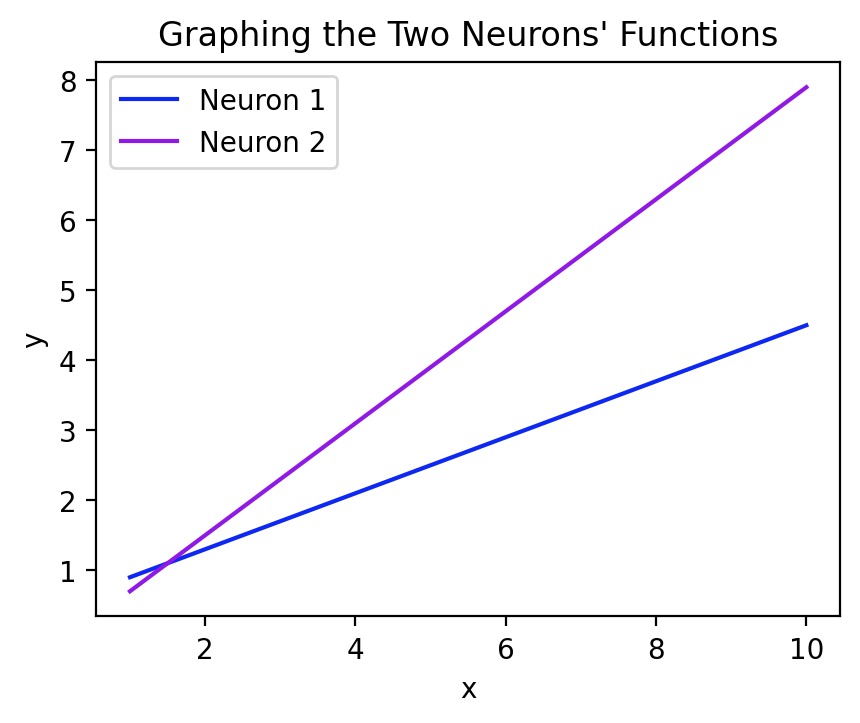

In [2]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 11)

# Creating linear functions for each of the respective neurons
neuron_1 = 0.4 * x + 0.5
neuron_2 = 0.8 * x - 0.1

# Graphing the first neuron
plt.plot(x, neuron_1, label = 'Neuron 1', color = '#0C28F2')

# Graphing the second neuron
plt.plot(x, neuron_2, label = 'Neuron 2', color = '#9119E5')

# Makin' it pretty!
plt.title("Graphing the Two Neurons' Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

Now, what happens when you add two linear functions together? Or put more simply, what happens when you add two lines together? Well, you get another line. Let's go ahead and graph this new line.

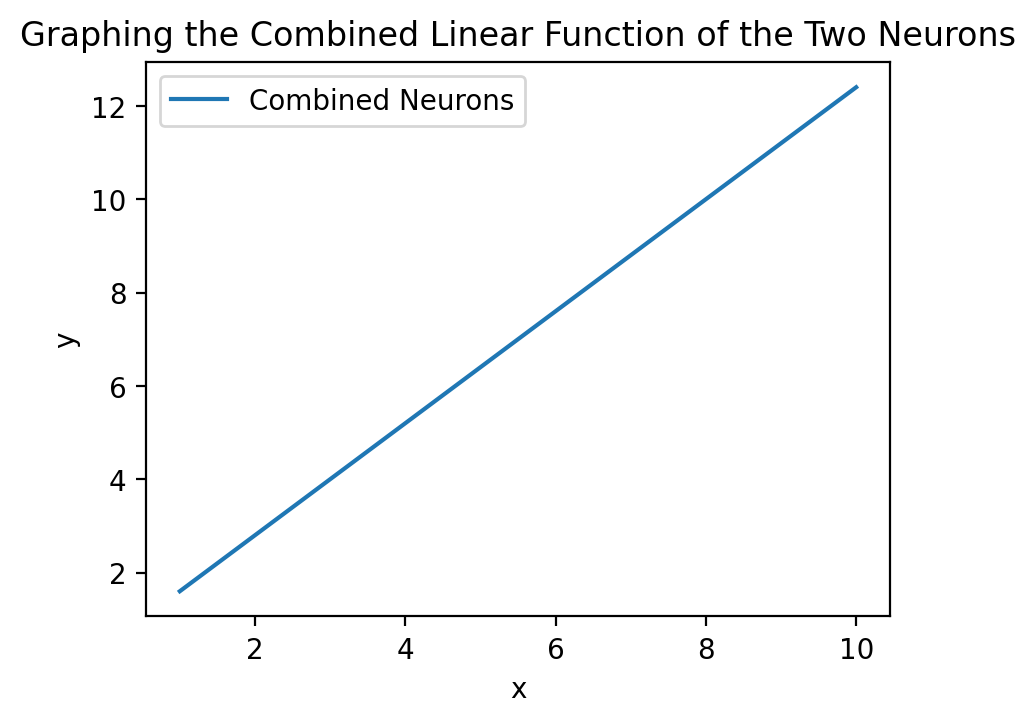

In [3]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 11)

# Creating the function combining the two neurons together
combined_neurons = 1.2 * x + 0.4

# Graphing the combined linear function
plt.plot(x, combined_neurons, label = 'Combined Neurons')

# Makin' it pretty!
plt.title("Graphing the Combined Linear Function of the Two Neurons")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

Now, I hope you're beginning to appreciate the problem here: a line isn't going to cleanly separate data. More specifically, most data is going to look like this:

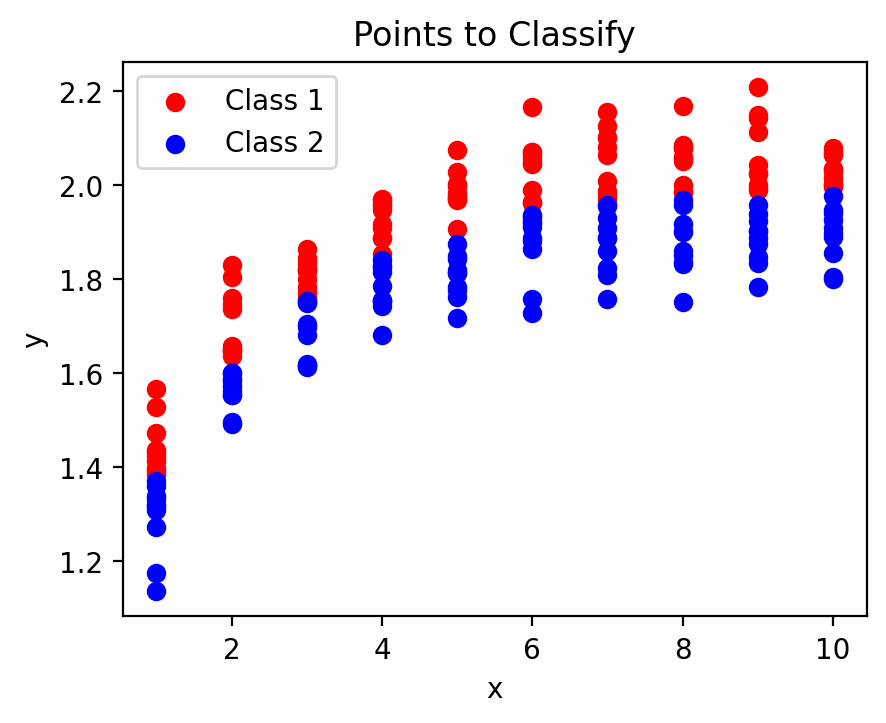

In [4]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Creating a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Setting the number of points per class and standard deviation
num_points_per_class = 10
std_dev = 0.1

# Instantiating containers to hold the class 1 and class 2 values
y_class1 = []
y_class2 = []

# Iterating over the original outputs
for output in outputs:
    
    # Ensuring class 1 points are above the line
    y_class1.extend(output + np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
    # Ensuring class 2 points are below the line
    y_class2.extend(output - np.abs(np.random.normal(0, std_dev, num_points_per_class)))

# Plotting the points
plt.scatter((np.repeat(x, num_points_per_class)), y_class1, color = 'red', label = 'Class 1')
plt.scatter((np.repeat(x, num_points_per_class)), y_class2, color = 'blue', label = 'Class 2')

# Makin' it pretty
plt.title('Points to Classify')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

Just for fun, let's apply that same combined line from above and see how the points fare.

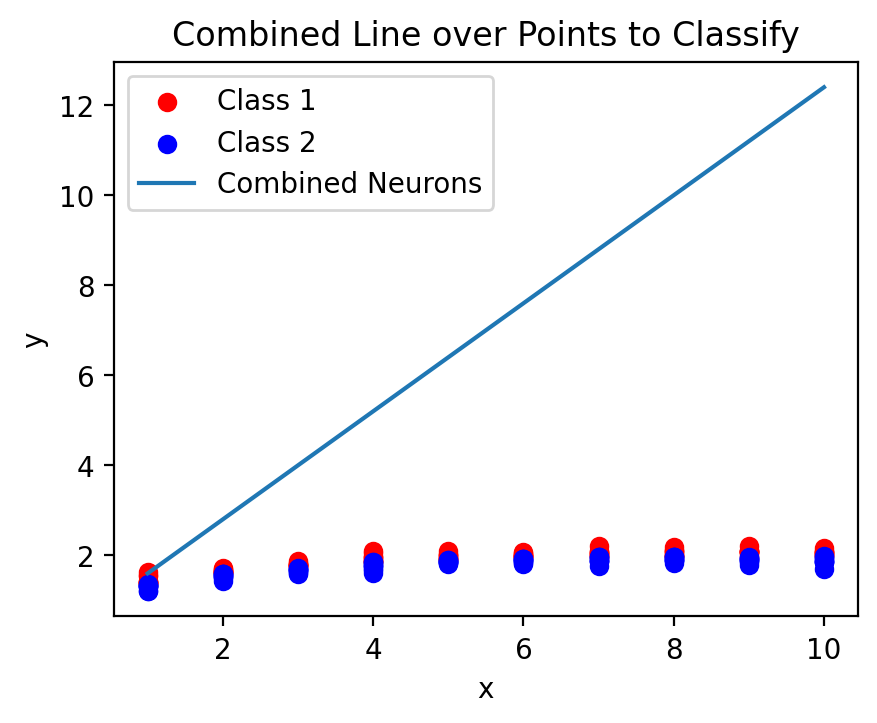

In [5]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Creating a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Setting the number of points per class and standard deviation
num_points_per_class = 10
std_dev = 0.1

# Instantiating containers to hold the class 1 and class 2 values
y_class1 = []
y_class2 = []

# Iterating over the original outputs
for output in outputs:
    
    # Ensuring class 1 points are above the line
    y_class1.extend(output + np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
    # Ensuring class 2 points are below the line
    y_class2.extend(output - np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
# Plotting the points
plt.scatter((np.repeat(x, num_points_per_class)), y_class1, color = 'red', label = 'Class 1')
plt.scatter((np.repeat(x, num_points_per_class)), y_class2, color = 'blue', label = 'Class 2')

# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 11)

# Creating the function combining the two neurons together
combined_neurons = 1.2 * x + 0.4

# Graphing the combined linear function
plt.plot(x, combined_neurons, label = 'Combined Neurons')

# Makin' it pretty
plt.title('Combined Line over Points to Classify')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

As you can see, this line doesn't even come close to measuring the accuracy of the classifications because the line has only grown and grown and grown.

Now, let's simulate what happens when we add an activation function. Don't worry about the details for now as we'll get to them later, but for this example, we're going to apply a simple **sigmoid** activation function. This particular activation function will take all the output values from the hidden layer and transform them one more time on an s-like curve produced by the sigmoid function. Let's take a look at what this output looks like now.

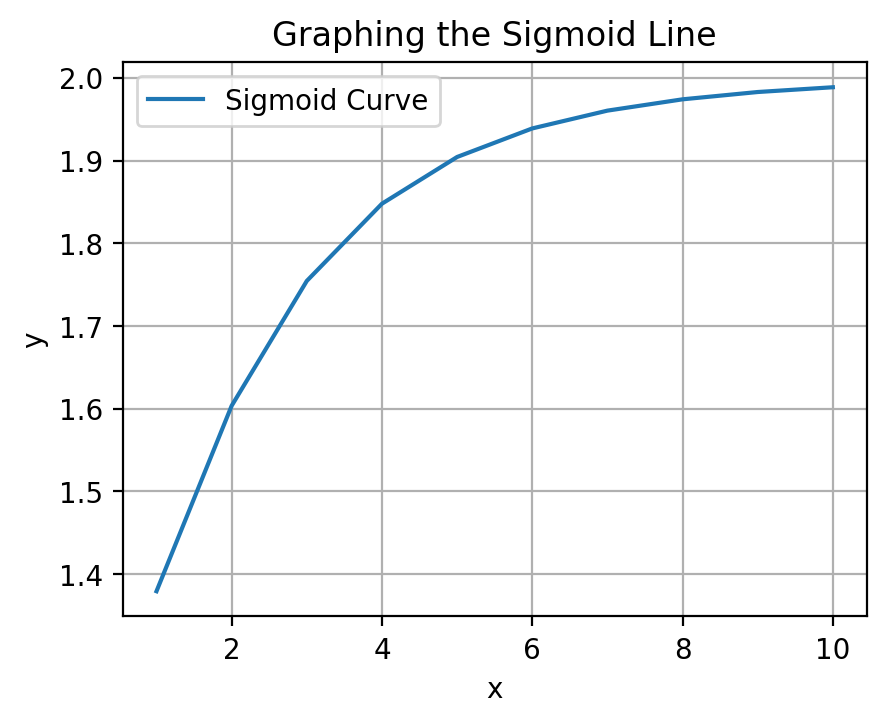

In [6]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Graphing the sigmoid line
plt.plot(x, outputs, label = 'Sigmoid Curve')

# Makin' it pretty!
plt.title("Graphing the Sigmoid Line")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'best')
plt.show();

Gone is the straight line, and we are now left with a gentle curve accelerating a bit more quickly in the beginning but then tapering off to right around 2.0. Let's see how this new line fares attempting to classify the same data points we showed above.

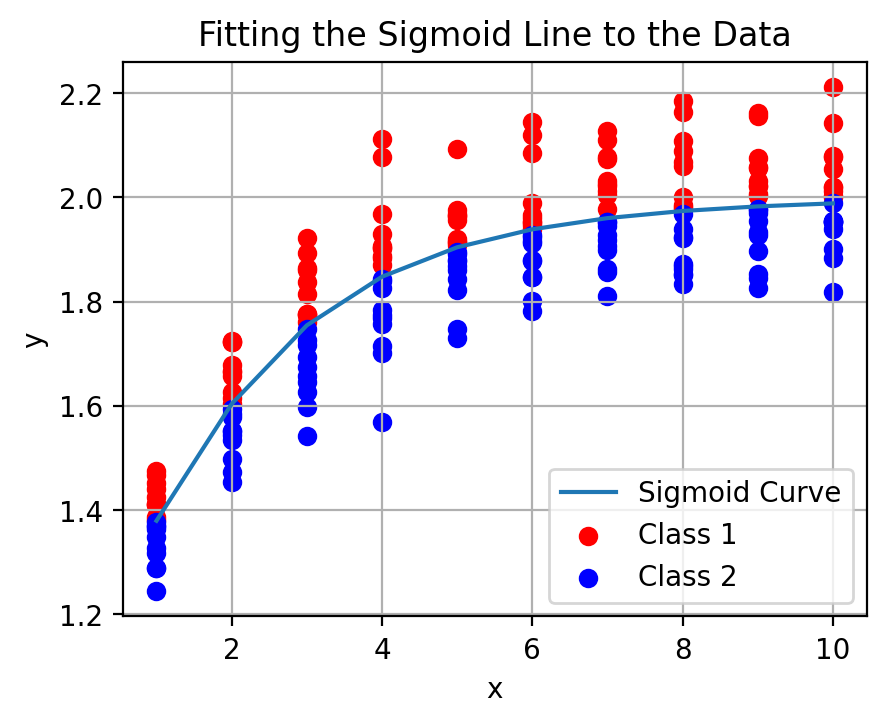

In [7]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Graphing the sigmoid line
plt.plot(x, outputs, label = 'Sigmoid Curve')

# Creating a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Setting the number of points per class and standard deviation
num_points_per_class = 10
std_dev = 0.1

# Instantiating containers to hold the class 1 and class 2 values
y_class1 = []
y_class2 = []

# Iterating over the original outputs
for output in outputs:
    
    # Ensuring class 1 points are above the line
    y_class1.extend(output + np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
    # Ensuring class 2 points are below the line
    y_class2.extend(output - np.abs(np.random.normal(0, std_dev, num_points_per_class)))

# Plotting the points
plt.scatter((np.repeat(x, num_points_per_class)), y_class1, color = 'red', label = 'Class 1')
plt.scatter((np.repeat(x, num_points_per_class)), y_class2, color = 'blue', label = 'Class 2')

# Makin' it pretty!
plt.title("Fitting the Sigmoid Line to the Data")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'best')
plt.show();

Much better! Now as you can probably guess, this example was cooked up by me to work out exactly perfectly, but the principle still stands: **Non-linearity is an absolute must for neural networks to perform optimally!** While this principle is perhaps the most important function that an activation function serves, there are a few other benefits that activation functions can provide. These include things like...

- **Control of information flow**: We'll touch on this one more a little later on, but there are certain activation functions that only allow certain values to pass through. Or, the output values that they produce come in a form restricted to a specific range of numbers. There are benefits to why we would want to do this, but again, we'll cover those when we get to those respective activation functions in the next section.
- **Determining the final behavior of the neural network**: In other words, we can use activation functions to produce either a binary class classification or a multiclass classification.
- **Mitigating vanishing gradient concerns**: There is a concern in many neural networks of a vanishing gradient problem. While we will not cover what this means in detail here, just be aware that certain activation functions like the ReLU function can help to mitigate these concerns.

Okay, that's our introduction to what activation functions and how they are generally beneficial to neural networks! Let's get into the nitty gritty and learn about those finer grained details by exploring twelve different types of activation functions.

## Twelve Different Types of Activation Functions
Throughout the remainder of this post, we will focus more intently on twelve different types of activation functions. In reality, you will likely only come across a few of these as some have tended to work better in broader context. To this end, we will cover each of these in a way that makes ideal sense to the learner, but be aware that there is no hierarchy of importance in the ordering. In each of these functions, we will provide the mathematical basis for how these functions were created, provide an intuition for the importance of each of these functions, and provide some code for integrating these activation functions across a few popular neural networking Python libraries.

### Sigmoid
Oftentimes referred to as the sigmoid "squishification" function, this s-shaped curve takes in any input and "squishes" it down between a range from 0 to 1. Here is the mathematical formula for calculating the sigmoid function:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

If you're not familiar with that *e* character there, that actually represents Euler's number, which is a constant value that is approximately 2.71828. While it's tempting to think that the *e* stands for Euler, that's actually just coincidence. We won't cover the number *e* within depth here, but I highly encourage that you check out [this YouTube video](https://youtu.be/AuA2EAgAegE?si=OweCYySETEy0Qrgt) to get a better intuition on it.

Here is what the sigmoid function looks like when graphed:

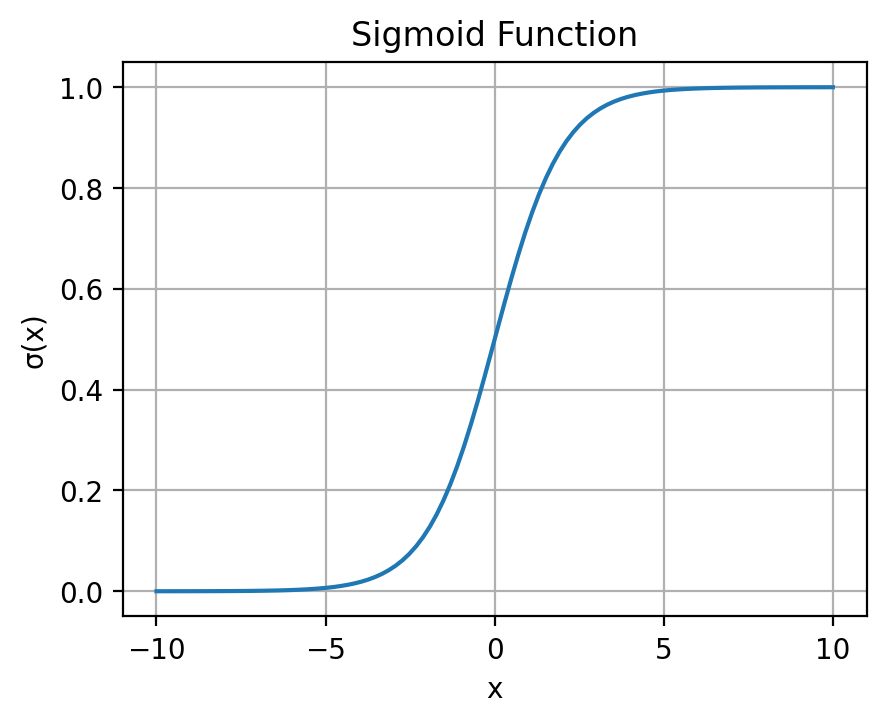

In [8]:
# Defining the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Calculating the sigmoid values based on the input 
y = sigmoid(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.show()

The sigmoid function was one of the first to be used partially for its simplicity but also because of its **invertibility**. Invertibility will play a fundamental role across the other activation functions, so let's define what we mean by that. **An invertible function is one that can always do a one-to-one match between the inputs and outputs.** Invertiblility is important as it helps us to still be able to manage the gradient appropriately through backpropagation. The sigmoid function is invertible as though it appears the ends converge at 0 and 1, they technically never do. In calculus terms, we would refer to 0 and 1 as **limits**, as in, the sigmoid line approaches 0 and 1 on either end but never quite make it to that limit.

To make invertibility very clear, let's graph out a sine wave function, which is not invertible.

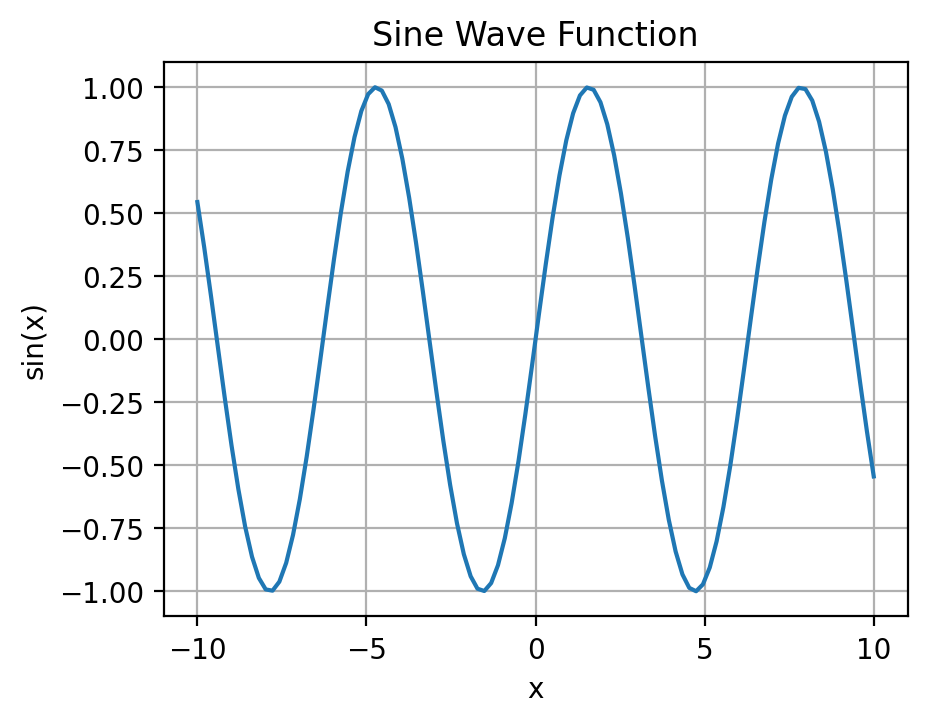

In [9]:
# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Calculating the sine values based on the input 
y = np.sin(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Sine Wave Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

Try answering this question: at what input value does the output value equal 1.00? The answer is, there is no singular answer to this question. It might be hard to spot where these *x* values fall, but it's actually at the positive and negative intervals of pi. Because of this lack of invertibility, this really messes with the notion of trying to backprop the gradient appropriately.

While the sigmoid function was historically one of the first to be used, it suffers from one noteworthy problem: for very low or very high values, the gradient nearly vanishes as either end of the sigmoid function almost becomes a horizontal line as it approaches the limits of 0 and 1. As a result, you will see the sigmoid function still used occasionally, but it is no longer as popular as it once was.

If you would like to use the sigmoid function, here is the Python code to do so across a few popular neural networking libraries.

In [ ]:
## PyTorch Implementation
## ---------------------------------------------------------------------
import torch
import torch.nn as nn


# Defining a simple neural network with sigmoid activations
class Torch_Model(nn.Module):
    
    def __init__(self):
        super(Torch_Model, self).__init__()
        self.fc1 = nn.Linear(in_features = INPUT_SIZE, out_features = HIDDEN_SIZE),
        self.fc2 = nn.Linear(in_features = HIDDEN_SIZE, out_features = OUTPUT_SIZE)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
    
    

## Keras / TensorFlow Implementation
## ---------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiating a simple sequential neural network with a sigmoid output layer
tf_model = Sequential([
    Dense(INPUT_SIZE, input_shape = (10, ), activation = 'sigmoid'),
])



## JAX Implementation
## ---------------------------------------------------------------------
import jax
import jax.numpy as jnp
from flax import linen

# Creating a simple JAX model with a sigmoid output
class JAX_Model(linen.Module):
    @linen.compact
    def __call__(self, x):
        x = linen.Dense(HIDDEN_SIZE)(x)
        x = linen.Dense(OUTPUT_SIZE)(x)
        return linen.sigmoid(x)

### Hyperbolic Tangent (Tanh)
The hyperbolic tangent function is very similar to the sigmoid function, except with one key difference: where the sigmoid function "squished" the data into a range from 0 to 1, the hyperbolic tangent function has a very similar output except with ranges from -1 to 1. Let's show what this looks like on a chart.

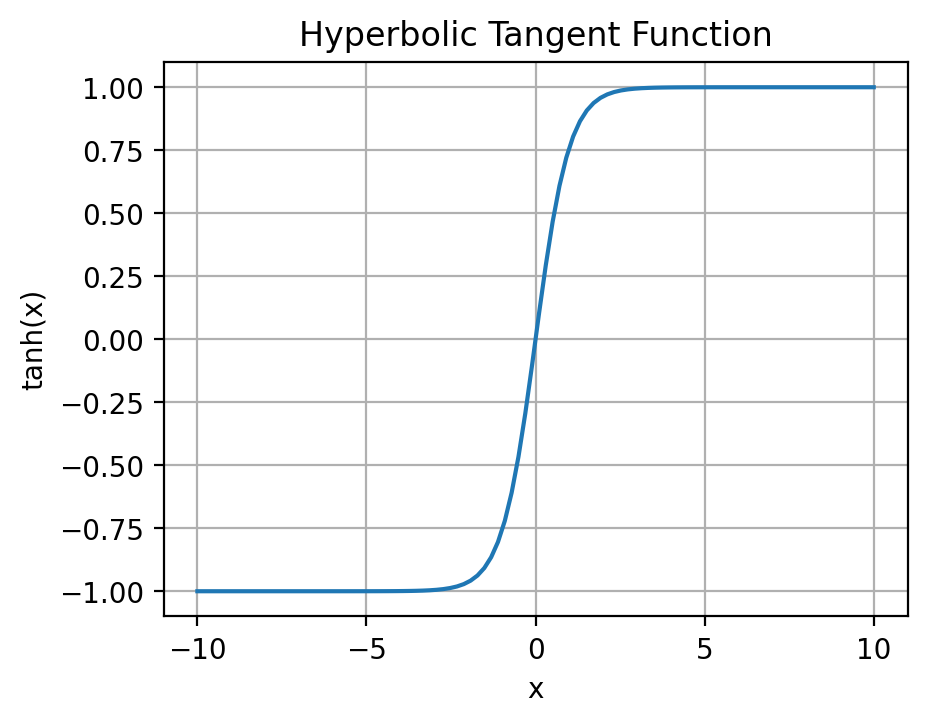

In [10]:
# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Calculating the tanh values based on the input 
y = np.tanh(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Hyperbolic Tangent Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.show()

Without getting too deep on the math here, the reason it is called a hyperbolic tangent function is because tangent functions have correlations to trigonometry and other trigonometric concepts like a sine and cosine wave. Typically, trigonometric concepts revolve around circles, but these hyperbolic functions revolve around hyperboles. That's about as far as I want to go with the math as I don't want to overwhelm you. Ultimately, you just need to be aware of what the final function looks like, but just for fun, let's show what the mathematical formula looks like:


$$ \tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

So the ultimate question is, why would we want to use this function over the sigmoid function? Its greatest strength is in the fact that the center of the hyperbolic tangent function lies around the zero value. The advantage for this is that **zero-centered data can lead to a faster optimization of gradient descent**. However, you still may be interested in using the sigmoid function in something like an output layer if you expect the final outputs to fall within that specific 0 to 1 range.

The challenge with both the sigmoid and hyperbolic tangent functions is that they have a tendency to suffer from the vanishing gradient problem. The sigmoid function fares a little worse with the vanishing gradient since the slopes around the middle value are "shallower" than they are with the hyperbolic tangent function. But still, both of these function have paved the road for the necessity of our next few functions.

Before we move on, let's cover how to implement the hyperbolic tangent function in popular neural networking libraries.

In [ ]:
## PyTorch Implementation
## ---------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F

# Defining a simple neural network with a hyperbolic tangent (tanh) activation layer
class Torch_Model(nn.Module):
    
    def __init__(self):
        super(Torch_Model, self).__init__()
        self.fc1 = nn.Linear(in_features = INPUT_SIZE, out_features = HIDDEN_SIZE),
        self.fc2 = nn.Linear(in_features = HIDDEN_SIZE, out_features = OUTPUT_SIZE)
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        return x



## Keras / TensorFlow Implementation
## ---------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiating a simple sequential neural network with a hyperbolic tangent (tanh) output layer
tf_model = Sequential([
    Dense(INPUT_SIZE, input_shape = (10, ), activation = 'tanh'),
])



## JAX Implementation
## ---------------------------------------------------------------------
import jax
import jax.numpy as jnp
from flax import linen

# Creating a simple JAX model with a hyperbolic tangent (tanh) activation layer
class JAX_Model(linen.Module):
    @linen.compact
    def __call__(self, x):
        x = linen.Dense(HIDDEN_SIZE)(x)
        x = jnp.tanh(x)
        x = linen.Dense(OUTPUT_SIZE)(x)
        return x

### ReLU (Rectified Linear Unit)
This function here is arguably the most popular one used in modern neural networks. It behaves very differently from the two functions we've already looked at in the way it treats both negative and positive inputs. Let's go ahead and show a chart of what the ReLU function looks like.

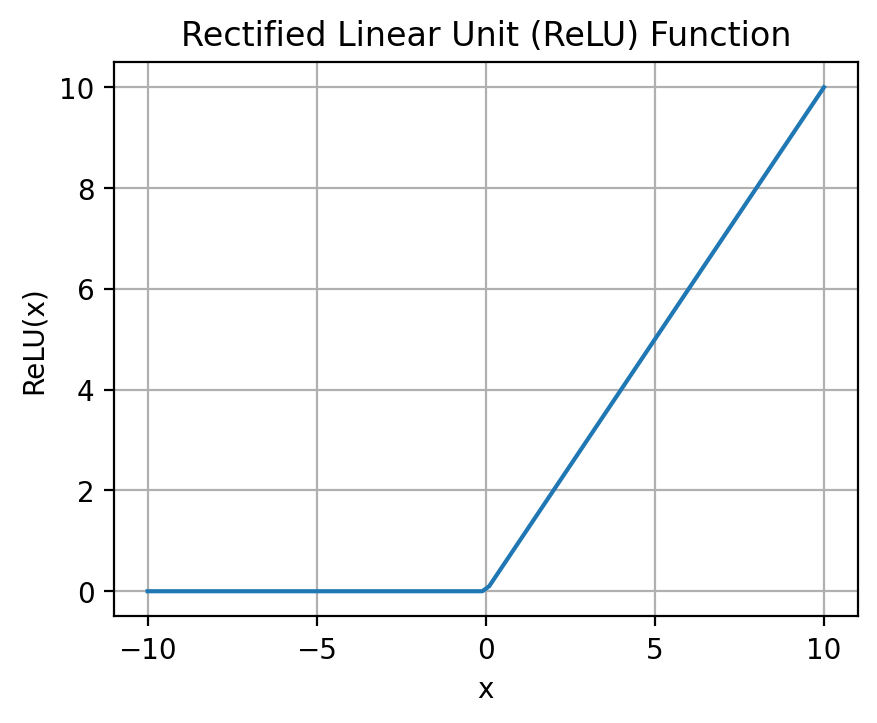

In [11]:
# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Defining a simple ReLU function
def ReLU(x):
    return np.maximum(0, x)

# Getting the ReLU values from the input
y = ReLU(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Rectified Linear Unit (ReLU) Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

Computing this value is very simple: all input values with a negative value get an output of zero, and all input values with a positive value simply pass right through with the same value as its output. Here's how we would demonstrate that using mathematical notation:

$$ ReLU(x) = \max(0, x) $$

In case you're wondering where the term "rectified" comes from, it's actually an electrical engineering term. In electrical engineering, "rectification" is the conversion of alternating current (AC) power from its positive or negative value to a direct current (DC) value which can only take on positive or zero values.

Let's talk about the benefits of using a ReLU function. Recall from the sigmoid and hyperbolic tangent function sections that we had a problem with a vanishing graident if the input values got too big or too small. By having a consistent gradient (at least for positive values), the vanishing gradient problem goes away.

Another concept that ReLU activation functions add to the mix is the concept of **sparsity**. In the computer science world, sparsity generally refers to having a large list of values but many of those values may be null or zero. For example, here's a simple list of integers:

```
[0, 0, 0, 2, 0, 1, 0, 0, 4, 0, 0, 0, 0, 3]
```

We would refer to this list as sparse because it has a lot of zero values. Because a ReLU function produces a zero for any negative value, that essentially turns the output of that given neural network neuron into a sparse one. This sparsity can actually be a good thing since it can help reduce to models unnecessarily overfitting.

Now you might be wondering, "Isn't the primary concern of all activation functions to introduce non-linearity into an overall neural network, and isn't ReLU just producing us straight lines?" It's a very good question, but keep in mind, not all neurons are going to produce the same output value. As such, using a ReLU activation function still introduces non-linearity to the overall neural network, particularly with that sparsity introduced by zeroing-out the negative inputs.

Let's show the code for calculating ReLUs in popular neural network libraries.

In [ ]:
## PyTorch Implementation
## ---------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F

# Defining a simple neural network with a ReLU activation layer
class Torch_Model(nn.Module):
    
    def __init__(self):
        super(Torch_Model, self).__init__()
        self.fc1 = nn.Linear(in_features = INPUT_SIZE, out_features = HIDDEN_SIZE),
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features = HIDDEN_SIZE, out_features = OUTPUT_SIZE)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



## Keras / TensorFlow Implementation
## ---------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiating a simple sequential neural network with a ReLU output layer
tf_model = Sequential([
    Dense(INPUT_SIZE, input_shape = (10, ), activation = 'relu'),
])



## JAX Implementation
## ---------------------------------------------------------------------
import jax
import jax.numpy as jnp
from flax import linen

# Creating a simple JAX model with a ReLU activation layer
class JAX_Model(linen.Module):
    @linen.compact
    def __call__(self, x):
        x = linen.Dense(HIDDEN_SIZE)(x)
        x = linen.relu(x)
        x = linen.Dense(OUTPUT_SIZE)(x)
        return x

As mentioned before, ReLUs have gained much popularity in modern neural networks, so it might not surprise you to learn that there are subtle variants on the ReLU designed for specific use cases. Those will be the next few functions that we cover.

### Leaky ReLU
The next few activation functions we'll cover are derivations of the "vanilla" ReLU function that we covered in the previous section. This first one is called the leaky ReLU, and the reason we refer to it as "leaky" is because this one actually does allow some negative values to propagate through the activation function. Here is what it might look like on a graph.

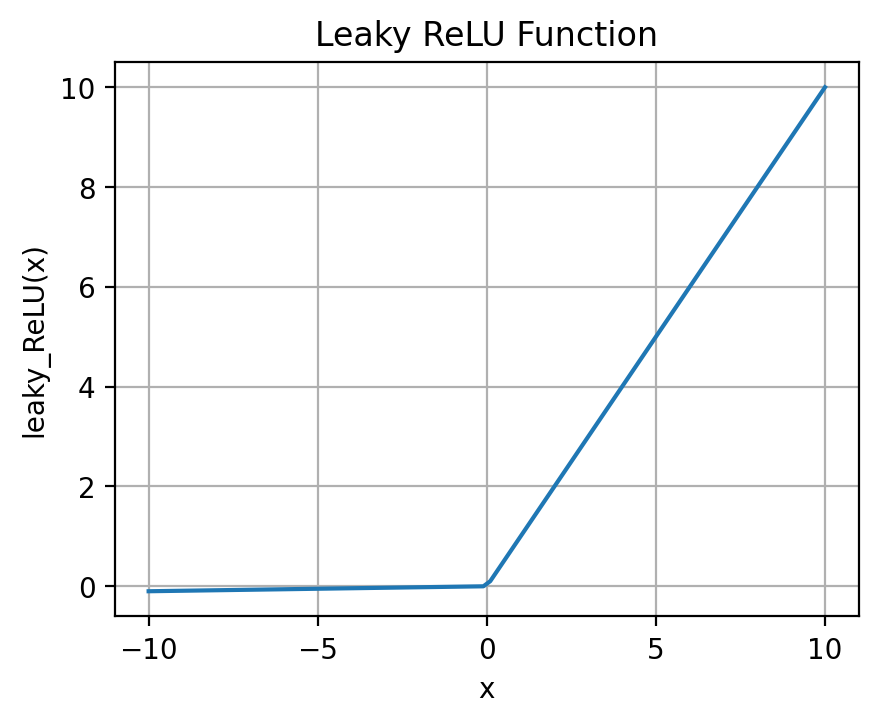

In [3]:
# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Defining a simple ReLU function
def leaky_ReLU(x, alpha = 0.01):
    return np.where(x > 0, x, alpha * x)

# Getting the ReLU values from the input
y = leaky_ReLU(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Leaky ReLU Function')
plt.xlabel('x')
plt.ylabel('leaky_ReLU(x)')
plt.grid(True)
plt.show()

At first blush, this might look very similar to the standard ReLU function, but notice the negative side of the chart. There is a very slight decline as the input number becomes more negative. Where the standard ReLU function sets all negative input values to a zero output value, the output value in a leaky ReLU function for negative values is the negative value multiplied by a small, constant value. This small, constant value is referred to as the **alpha** constant, and it is represented by the Greek character $ \alpha $. (For context, the alpha value set in the graph above is 0.01.) Positive input values are treated the same across both the leaky and standard ReLU functions. Here is what the mathematical notation looks like:

$$ f(x) = \begin{cases} 
x & \text{if } x \geq 0 \\
\alpha x & \text{if } x < 0 
\end{cases}$$

Ultimately, the leaky ReLU is all about maintaining non-zero gradients for negative values. In some circumstances, you can have an issue with a neuron with a standard ReLU gets stuck in that negative state and essentially "dies." In other words, a neuron that gets its ReLU stuck on that negative side of thing basically makes it null and void to the collective neural network. Additionally, there can be some value in allowing negative values to propagate through a neural network.

There isn't really a black and white answer to when you should use ReLU versus the leaky ReLU. Sometimes a standard ReLU can lead to results just as good or even better than using the leaky ReLU, so the choice of which way you choose to go will be down to your own testing and validation.

Let's review the Python code for enabling this function.

In [ ]:
## PyTorch Implementation
## ---------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F

# Defining a simple neural network with a leaky ReLU activation layer
class Torch_Model(nn.Module):
    
    def __init__(self):
        super(Torch_Model, self).__init__()
        self.fc1 = nn.Linear(in_features = INPUT_SIZE, out_features = HIDDEN_SIZE),
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.fc2 = nn.Linear(in_features = HIDDEN_SIZE, out_features = OUTPUT_SIZE)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.leaky_relu(x)
        x = self.fc2(x)
        return x



## Keras / TensorFlow Implementation
## ---------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

# Instantiating a simple sequential neural network with a leaky ReLU output layer
tf_model = Sequential([
    Dense(INPUT_SIZE, input_shape = (10, ), activation = LeakyReLU(alpha = 0.01)),
])



## JAX Implementation
## ---------------------------------------------------------------------
import jax.numpy as jnp
from flax import linen

# Creating a simple JAX model with a leaky ReLU activation layer
class JAX_Model(linen.Module):
    @linen.compact
    def __call__(self, x):
        x = linen.Dense(HIDDEN_SIZE)(x)
        x = jax.nn.leaky_relu(x, 0.01)
        x = linen.Dense(OUTPUT_SIZE)(x)
        return x

### Parametric ReLU (PReLU)
Moving along to our next variant of the ReLU function, we have the parametric ReLU (PReLU) function. The PReLU is pretty similar to the leaky ReLU, except instead of defining a static, constant alpha value for the negative inputs, the alpha becomes a parameter in and of itself and can be trained alongside training the other parameters of the neural network. As such, we'll show the graph for a PReLU, but it's going to look a lot like the leaky ReLU.

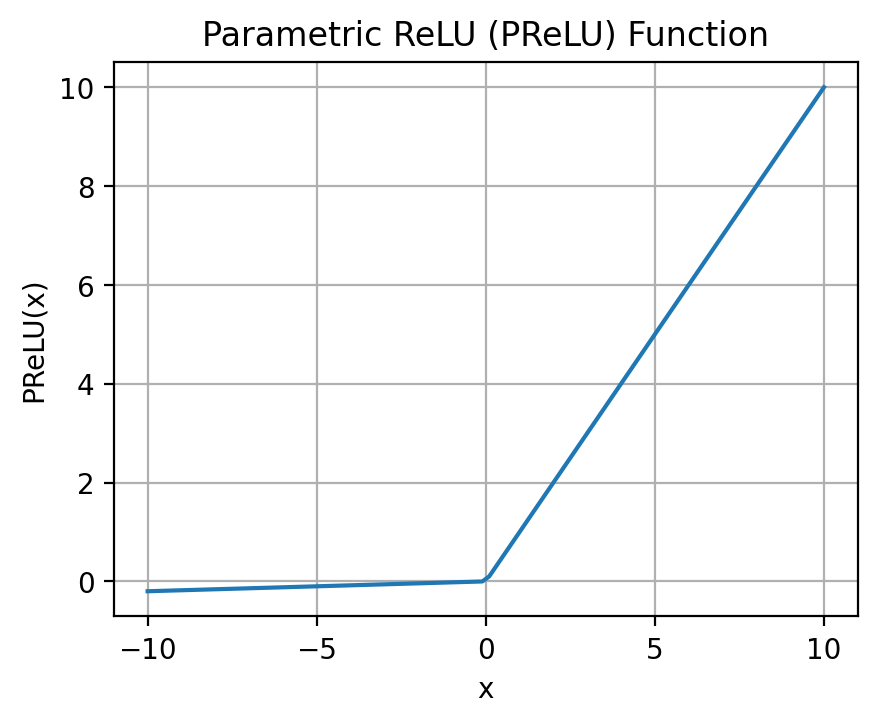

In [1]:
# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Defining a simple ReLU function
def PReLU(x, alpha = 0.02):
    return np.where(x > 0, x, alpha * x)

# Getting the ReLU values from the input
y = PReLU(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Parametric ReLU (PReLU) Function')
plt.xlabel('x')
plt.ylabel('PReLU(x)')
plt.grid(True)
plt.show()

To differentiate the PReLU's graph from the leaky ReLU's, I set the alpha to 0.02 as opposed to the leaky ReLU's alpha of 0.01. But again, this does NOT mean that we set the alpha manually as we do with the leaky ReLU. This is a learned parameter that is trained alongside the rest of the neural network. For consistency's sake, let's show the mathematical formula for calculating a PReLU, although this will be the exact same as what we saw previously with the leaky ReLU.

$$ f(x) = \begin{cases} 
x & \text{if } x \geq 0 \\
\alpha x & \text{if } x < 0 
\end{cases}$$

You might be curious why we would ever choose to use ReLU or leaky ReLU over the PReLU, especially given that the alpha value in the PReLU is a learned parameter. Well, simply put, all three different types of ReLUs have a tendency to perform better in niche cases. Your best bet if curious how a ReLU performs is to try all three variants in your own specific context.

Here's how we can make use of PReLU across the neural network libraries.

In [ ]:
## PyTorch Implementation
## ---------------------------------------------------------------------
import torch
import torch.nn

# Defining a simple neural network with a PReLU layer
class Torch_Model(nn.Module):
    
    def __init__(self):
        super(Torch_Model, self).__init__()
        self.fc1 = nn.Linear(in_features = INPUT_SIZE, out_features = HIDDEN_SIZE),
        self.prelu = nn.PReLU()
        self.fc2 = nn.Linear(in_features = HIDDEN_SIZE, out_features = OUTPUT_SIZE)
        
    def forward(self, x):
        x = self.prelu(self.fc1(x))
        x = self.fc2(x)
        return x



## Keras / TensorFlow Implementation
## ---------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU

# Instantiating a simple sequential neural network with a leaky ReLU output layer
tf_model = Sequential([
    Dense(64, input_shape = (100, )),
    PReLU()
])



## JAX Implementation
## ---------------------------------------------------------------------
import jax.numpy as jnp
from flax import linen

# Creating a class to manage the PReLU
class PReLU(linen.Module):
    @linen.compact
    def __call__(self, x):
        alpha = self.param('alpha', jax.nn.initalizers.zeros, (x.shape[-1]))
        return jnp.where(x >= 0, x, alpha * x)

# Creating a simple JAX model with a parametric ReLU activation layer
class JAX_Model(linen.Module):
    @linen.compact
    def __call_(self, x):
        x = linen.Dense(HIDDEN_SIZE)(x)
        x = PReLU()(x)
        x = linen.Dense(OUTPUT_SIZE)(x)
        return x

### Exponential Linear Unit (ELU)

### Scaled Exponential Linear Unit (SELU)

### Softmax

### Softplus

### Swish

### Maxout

### Identity